In [1]:
# !pip install opencv-python
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code= cv2.COLOR_BGR2GRAY)
    return image

In [3]:
def detect_stave_distance(im):
    '''
    Given grayscale PIL.Image of sheet music, use Hough transform to find
    distance between staves.
    Use 2D voting space (D1 = row of first line, D2 = spacing distance)

    Params:
        im (PIL.Image): grayscale image of sheet music

    Returns:
        staveDist (float): distance between staves
    '''
    pass

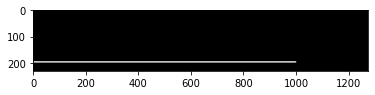

In [31]:
image = processImage('images/music1.png')
edges = cv2.Canny(image, 50, 150, apertureSize = 3)
# edges
# plt.imshow(edges)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
# cv2.HoughLines()
canvas = np.zeros((image.shape[0],image.shape[1]))
# plt.imshow(lines)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(canvas,(x1,y1),(x2,y2),255,3)
# lines
# plt.figure(figsize = (200,300))
plt.gray()
plt.imshow(canvas)
